# Servo Prediction using Linear Regression #

# Understanding the Dataset:

A **servo** is an automatic device used in control engineering that adjusts its output using error-sensing feedback to achieve the desired effect. It’s commonly used to control mechanical positions, speeds, or other measurable variables. For example, unlike a power window in a car, which requires manual observation, a car's cruise control uses feedback to maintain speed automatically, making it a servomechanism.

This dataset contains `167 observations with 5 variables`. It's from a simulation of a servo system, likely involving components like a servo amplifier, motor, lead screw, and sliding carriage, possibly part of a robot's axis. The output, known as "Class," likely represents the time it takes for the system to adjust to a new position.

**Variables:**
1. **Motor:** A, B, C, D, E
2. **Screw:** A, B, C, D, E
3. **Pgain:** 3, 4, 5, 6
4. **Vgain:** 1, 2, 3, 4, 5
5. **Class (Output):** 0.13 to 7.10 (rise time)

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [2]:
Servo_data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')


# Getting first five rows dataframe #

In [3]:
Servo_data.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


# Get information about Dataframe #

In [4]:
Servo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.7+ KB


# Get summary Statistics #

In [5]:
Servo_data.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


# Get Columns Names

In [6]:
Servo_data.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

# Get Categorries and Count of Categorical Variables

In [7]:
Servo_data[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [8]:
Servo_data[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

# Get Encoding of Categorical Features

In [9]:
Servo_data.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

C:\Users\ksubh\AppData\Local\Temp\ipykernel_16824\473619769.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Servo_data.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)


In [10]:
Servo_data.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

C:\Users\ksubh\AppData\Local\Temp\ipykernel_16824\586593338.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Servo_data.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)


# Define Target Variable (y) and Feature Variables (X) #

In [11]:
X = Servo_data.drop('Class', axis=1)
y = Servo_data['Class']

In [12]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


In [13]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

#  Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Prediction #

In [16]:
y_pred = model.predict(X_test)

In [17]:
y_pred

array([32.37085649,  4.83474777, 35.25754161, 29.15321684, 33.78535427,
       39.55872449, 17.54878682,  9.22153868, 15.7735634 , 34.8391264 ,
       14.66210171, 25.09738047, 35.14216248, 33.7276647 , 10.72349712,
       32.01013085, -3.82530757, 38.08653716, 39.50103493, 29.06575617,
       12.82918873, 19.35378135, 17.24575074, 20.07474629, 21.84996971,
       12.16591335, 21.60462319, 20.37778237, 22.26838492, 30.84097959,
       16.13428905, 20.79619758, 20.13243586, 38.14422672])

# Get Model Evaluation #

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [19]:
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 65.85153026778552
Mean Absolute Error: 6.943574779889392
R-squared: 0.7191490505791939


# Get Visualization of Actual Vs Predicted Results


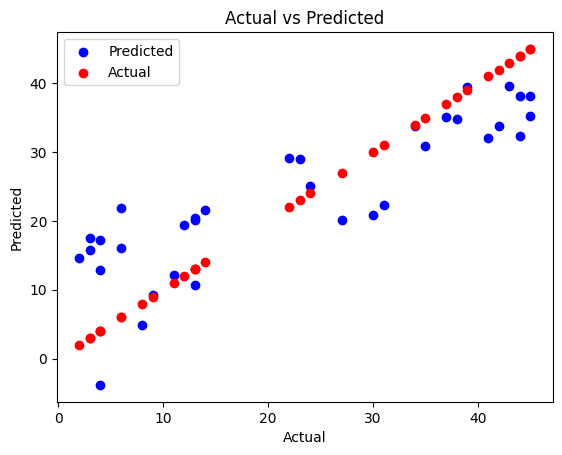

In [25]:
import matplotlib.pyplot as plt

# Scatter plot with custom colors for actual and predicted points
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')

# Labeling the axes
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Title of the plot
plt.title("Actual vs Predicted")

# Adding a legend to distinguish actual and predicted points
plt.legend()

# Display the plot
plt.show()


# Get Future Predictions #

**Let select a random sample from existing dataset as new value**
`steps to follow`
* Extract a random row using sample function
* Seprate X and Y
* Standardize X
* Predict

In [21]:
X_new=Servo_data.sample(1)

In [22]:
X_new

,Motor,Screw,Pgain,Vgain,Class
32,2,4,4,1,12


In [23]:
X_new.shape

(1, 5)

In [26]:
X_new=X_new.drop('Class', axis=1)

In [27]:
X_new

,Motor,Screw,Pgain,Vgain
32,2,4,4,1


In [28]:
X_new.shape

(1, 4)

In [30]:
y_pred_new=model.predict(X_new)

In [31]:
y_pred_new

array([10.00019318])

#  Explanation

# 1. Imported necessary libraries for data manipulation, visualization, and modeling.
# 2. Loaded the dataset from the specified source and examined its structure.
# 3. Visualized the target variable distribution and relationships between features.
# 4. Preprocessed the data by encoding categorical variables.
# 5. Defined the target variable (y) and feature variables (X).
# 6. Split the data into training and testing sets.
# 7. Trained a Linear Regression model on the training data.
# 8. Evaluated the model's performance using mean squared error and R-squared metrics.
# 9. Made predictions on new data using the trained model.
# This structured approach ensures a comprehensive analysis of the servo mechanism dataset.